<a href="https://colab.research.google.com/github/Geisielen/Identifica-o-de-sistemas/blob/main/Identifica%C3%A7%C3%A3o_de_Sistemas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center> <img src =   https://upload.wikimedia.org/wikipedia/commons/f/f8/Python_logo_and_wordmark.svg></center>

## <center> **Universidade Federal do Pará - UFPA**
## <center> **Campus Universitário de Tucuruí - CAMTUC**
## <center> **Faculdade de Engenharia Elétrica - FEE**
## <center> **Laboratório de Sistemas de Controle**
## <center> **Docente: Dr. Raphael Barros Teixeira**
## <center> **Discentes: Danilo, Geisielen e Walder**

In [ ]:
!pip install control # Instalando a Biblioteca de controle

     |████████████████████████████████| 348kB 7.3MB/s 
  Created wheel for control: filename=control-0.9.0-py2.py3-none-any.whl size=344920 sha256=15f119a26f02021a56e9e57d714fd3c1f8d44f7bfebd6fa3e8f7938dbc1a1472
  Stored in directory: /root/.cache/pip/wheels/35/be/ee/081b68ca3e4b2d253fba2f7f7e51960373903fb7b6d13c5532
Successfully built control


In [ ]:
import numpy as np                            # Carrega a biblioteca numpy
import matplotlib.pyplot as plt               # Carrega a biblioteca de figuras
import pandas as pd                           # Extrai arquivos csv
import control as ct                          # Carrega a biblioteca de controle
from google.colab.patches import cv2_imshow
from skimage import io
from PIL import Image
from scipy.signal import max_len_seq
from sklearn.metrics import mean_squared_error # função para calcular o erro médio quadrático
import math


## <center>**Resumo**
<p align = "justify" >
<fon size="4" face="Times New Romaw, Times, serif">
Este trabalho apresenta uma estratégia para a identificação de um sistema por estimação de mínimos quadrados, a partir de dados de entrada e de saída. Por expressarem características invariantes do sistema, faz-se uso de MQ para minimizar o erro, que garante a caracterização da função de transferência. O estudo é justificado pela grande complexidade de apresentar uma única solução frente a um sistema sobredeterminado. Assim, utilizando técnicas consolidadas de estimação, métricas, modelos são identificados a partir de dados simulados do sistema. Os resultados permitem identificar o sistema e caracterizar o comportamento do sistema em termos de suas propriedades invariantes.

## <center> **1 Introdução**
<p align = "justify" >
<fon size="4" face="Times New Romaw, Times, serif">
Caracterizaçãoo paramétrica pode ser interpretada
como o processo de descrever o comportamento
e demais propriedades físicas de um sistema diante
da variaçãoo de um parâmetro de interesse
(Jing et al., 2008).
<p align = "justify" >
<fon size="4" face="Times New Romaw, Times, serif">
As práticas metodológicas de ensino em engenharia têm contribuído para a formação de
profissionais capazes de aliar conceitos teóricos a aplicações técnicas. Estes métodos têm sido
desenvolvidos baseados principalmente nas dificuldades encontradas pelos estudantes durante
a formação acadêmica (POWELL et al., 2015).
<p align = "justify" >
<fon size="4" face="Times New Romaw, Times, serif">
Na graduação, a maioria dos estudantes de
engenharia enxerga boa parte da grade curricular do curso como algo abstrato. Além disso, há
dificuldade de conectar os conceitos entre as áreas dentro da Engenharia Elétrica, dificultando
o desenvolvimento de trabalhos multidisciplinares. Outra questão persistente é a dificuldade
que os estudantes encontram em enxergar e relacionar os conceitos da Engenharia Elétrica no
seu dia a dia (POWELL et al., 2015).
<p align = "justify" >
<fon size="4" face="Times New Romaw, Times, serif">
Este trabalho apresenta a proposta de identificação do sistema a partir de amostras de tensão de entrada e de saída, o que garante potencial em aplicações em sistemas reais. Neste formalismo, os dados de entrada e de saída, foram separados para identificação e outro para validação do sistema. Após manipulações algébricas, foram estimados mínimos quadrados (MQ) os coeficientes para caracterização do sistema. A metodologia proposta, consiste de identificar uma função de transferência em tempo discreto que descreva o comportamento da planta.
<p align = "justify" >
<fon size="4" face="Times New Romaw, Times, serif">
Então, foram realizadas comparações com a resposta para o sistema de primeira ordem, segunda ordem e terceira ordem, com claro significado físico. O modelo que apresentou um comportamento significativo, foi o de terceira ordem, o que foi avaliado para sinais aleatórios também.
<p align = "justify" >
<fon size="4" face="Times New Romaw, Times, serif">
O restante do trabalho é desenvolvido da seguinte maneira. Na seção 2 apresenta-se a metodologia do trabalho onde são mostradas as formulações dos mínimos quadrados e métricas para a identificação do sistema em tempo discreto. Na seção 3, a partir da identificação do sistema motor-gerador, apresentam-se os resultados obtidos por meio da estimação dos MQ. A seção 4 apresenta as conclusões e possíveis abordagens futuras.

## <center> **2 Metodologia**
<p align = "justify" >
<fon size="4" face="Times New Romaw, Times, serif">
Um sistema não linear, causal, de memória assintótica e invariante no tempo, com entrada $u(t)$ e saída $y(t)$, pode ser representado pela equação em tempo discreto,
<p align = "justify" >
<fon size="4" face="Times New Romaw, Times, serif">
$$H(z)=\frac{y(z)}{u(z)}=\frac{b_1 z + b_0}{z^2 + a_1 z + a_2}$$
<p align = "justify" >
<fon size="4" face="Times New Romaw, Times, serif">
se multiplicarmos no numerador e denominador por $z^{-2}$,
<p align = "justify" >
<fon size="4" face="Times New Romaw, Times, serif">
$$H(z) = \frac{y(z)}{u(z)}= \frac{b_1 z^{-1} + b_0 z^{-2}}{1 + a_1 z^{-1} + a_2 z^{-2}}$$
<p align = "justify" >
<fon size="4" face="Times New Romaw, Times, serif">
considerando $z^{-1}$ como operador de atraso e expandindo a equação para o domínio do tempo,
<p align = "justify" >
<fon size="4" face="Times New Romaw, Times, serif">
$$y(n) + a_1 y(n-1) + a_2 y(n-2) = b_1 u(n-1) + b_0 u(n-2)$$ 
<p align = "justify" >
<fon size="4" face="Times New Romaw, Times, serif">
chega-se em uma equação de diferença de 2ª ordem,
<p align = "justify" >
<fon size="4" face="Times New Romaw, Times, serif">
$$- a_1 y(n-1) - a_2 y(n-2) + b_1 u(n-1) + b_0 u(n-2) = y(n)$$
<p align = "justify" >
<fon size="4" face="Times New Romaw, Times, serif">
a qual pode ser representado por um conjunto de equações lineares de tempo contínuo,
<p align = "justify" >
<fon size="4" face="Times New Romaw, Times, serif">
$$\begin{array}{ccccc}
-&a_1 y(n-1)&-&a_2 y(n-2)&+&b_1 u(n-1)&+&b_0 u(n-2)&=& y_n \\
-&a_1 y(0)&-&a_2 y(-1)&+&b_1 u(0)&+&b_0 u(-1)&=& y_1 \\
-&a_1 y(1)&-&a_2 y(0)&+&b_1u(1)&+&b_0u(0)&=& y_2 \\
-&a_1 y(2)&-&a_2 y(1)&+&b_1 u(2)&+&b_0 u(1)&=& y_3 \\
&\vdots&&\vdots&&\vdots&&\vdots&&\vdots&\\
-&a_1 y(N-1)&-&a_2 y(N-2)&+&b_1 u(N-1)&+&b_0 u(N-2)&=& y_N
\end{array}$$
<p align = "justify" >
<fon size="4" face="Times New Romaw, Times, serif">
onde N é o instante considerado e $y(n-1)$ é um vetor de variáveis regressoras, tomadas até o instante $N-1$.



## <center> **2.1 Identificação do Sistema**
<p align = "justify" >
<fon size="4" face="Times New Romaw, Times, serif">
A partir de um modelo MIMO de multivariáveis, de entrada $u(n)$ e saída $y(n)$, determina-se a função de transferência em tempo digital $H(z)$. As tensões de entrada, saída e tempo, foram divididas em uma matriz de uma linha e 499 colunas, respectivamente. Essa etapa é importante para separar os dados para identificar e validar o modelo do sistema. A geração de um falso sinal, o PRBS, foi utilizado como estratégia para chacoalhar o sistema para observar a sua resposta. A principal contribuição dessa etapa, é a obtenção do sinal de entrada e de saída. A família PRBS é escolhida, devido este sinal apresentar a propriedade de um espectro em frequência ser muito amplo e essa característica é importante para a identificação do sistema. Ou seja, para a avaliação do sistema de uma forma rica em detalhes, o diferencial desse sinal é aplicar na entrada do sistema um sinal de frequência muito amplo, entenda-se como muito maior que a resposta do sistema, permitindo, assim, obter uma perspectiva de todas as formas de resposta em frequência na saída desse sistema. Entretanto, o lado negativo desse sinal aleatório no mundo real é que a sua reprodução é difícil.

In [ ]:
amostras = pd.read_csv('/content/drive/MyDrive/Grupo3/ensaio G3.csv', header=None).values 
                                                 #.value Converte Array em numpy
t = amostras[0,:]                                # vetor com dados de tempo
input = amostras[1,:]                            # vetor com dados de input
output = amostras[2,:]                           # vetor com dados de output

t_iden, t_val = t[0:500], t[500:1001]
x_iden, x_val = input[0:500], input[500:1001]
y_iden, y_val = output[0:500], output[500:1001]

plt.figure(figsize=(10, 8))                      # Amplia a Figura
plt.subplot(211)
plt.plot(t, input, drawstyle = 'steps')
plt.title('Input signal P_rbs')
plt.xlabel('Tempo (s)')
plt.ylabel('Tensão (V)')
plt.grid(True)

plt.subplot(212)
plt.plot(t, output, 'g', drawstyle='steps')
plt.title('Output signal P_rbs')
plt.xlabel('Tempo (s)')
plt.ylabel('Tensão (V)')
plt.subplots_adjust(hspace=0.3)
plt.grid(True)

FileNotFoundError: ignored

## <center> **2.2 Sistema sobredeterminado**
<p align = "justify" >
<fon size="4" face="Times New Romaw, Times, serif">
Tomando o conjunto de equações lineares da seção anterior, passa-se para a forma matricial,
<p align = "justify" >
<fon size="4" face="Times New Romaw, Times, serif">
$$\begin{bmatrix}
-y(0) & -y(-1) & u(0) & u(-1) \\
-y(1) & -y(0) & u(1) & u(0) \\
-y(2) & -y(1) & u(2) & u(1) \\
\vdots & \vdots & \vdots & \vdots \\
-y(N-1)& -y(N-2) & u(N-1) & u(N-2)
\end{bmatrix}
.
\begin{bmatrix}
a_1 \\
a_2 \\
b_1 \\
b_0
\end{bmatrix}
=
\begin{bmatrix}
y(1) \\
y(2) \\
y(3) \\
\vdots \\
y(N)
\end{bmatrix}$$
<p align = "justify" >
<fon size="4" face="Times New Romaw, Times, serif">
onde o sistema dinâmico se reduz a matriz, com $N>n$, logo,
<p align = "justify" >
<fon size="4" face="Times New Romaw, Times, serif">
$$ Mx=y $$
<p align = "justify" >
<fon size="4" face="Times New Romaw, Times, serif">
a qual apresenta um sistema de equações sobredeterminado, ou seja, têm-se $M$ $\in$ $\mathbb{R}^{N x n}$, $y$ $\in$ $\mathbb{R}^{N x 1}$ e $x$ $\in$ $\mathbb{R}^{N x 1}$.
<p align = "justify" >
<fon size="4" face="Times New Romaw, Times, serif">
Como a matriz $M$ não é quadrada, ela não pode ser invertida. No entanto, pré-multiplicando em ambos os lados por $M^{T}$, tem-se, 
<p align = "justify" >
<fon size="4" face="Times New Romaw, Times, serif">
$$M^{T}Mx = M^{T}y$$
<p align = "justify" >
<fon size="4" face="Times New Romaw, Times, serif">
que é chamada de equação normal. Agora multiplicando em ambos os lados por $(M^{T}M)^{-1}$, tem-se,
<p align = "justify" >
<fon size="4" face="Times New Romaw, Times, serif">
$$(M^{T}M)^{-1}(M^{T}M)x = (M^{T}M)^{-1} M^{T} y$$
<p align = "justify" >
<fon size="4" face="Times New Romaw, Times, serif">
a qual se reduz na forma,
<p align = "justify" >
<fon size="4" face="Times New Romaw, Times, serif">
$$x = (M^{T}M)^{-1}M^{T}y$$

## <center> **2.3 O Método de Mínimos Quadrados (MQ)**
<p align = "justify" >
<fon size="4" face="Times New Romaw, Times, serif">

In [ ]:
n1 = np.arange(1, len(t_iden))
M1 = np.array([-y_iden[n1-1], x_iden[n1-1]]).T    # Matriz de Regressão
x1 = np.linalg.inv(M1.T@M1)@M1.T@y_iden[n1]       # Coeficientes

<p align = "justify" >
<fon size="4" face="Times New Romaw, Times, serif">
Sendo o sistema dinâmico e sobredeterminado,
<p align = "justify" >
<fon size="4" face="Times New Romaw, Times, serif">
 $$ Mx = y $$
 <p align = "justify" >
<fon size="4" face="Times New Romaw, Times, serif">
no qual apresenta muitas equações e poucas colunas e a $M$ não possuindo a inversa.

<p align = "justify" >
<fon size="4" face="Times New Romaw, Times, serif">
$$Mx = y$$ 
<p align = "justify" >
<fon size="4" face="Times New Romaw, Times, serif">
$$Mx-y = \xi$$
<p align = "justify" >
<fon size="4" face="Times New Romaw, Times, serif">
busca-se uma solução para tal sistema, porém uma solução que tenha algum "significado intuitivo". Dessa maneira, procede-se para a determinação dos parâmetros de estimação de MQ para minimizar o erro.

## <center> **3 Resultados**
<p align = "justify" >
<fon size="4" face="Times New Romaw, Times, serif">
A estratégia de identificação proposta foi testada em simulação python, utilizando como base um modelo motor-gerador tipo CC como sistema de estudo. A partir dos dados de entrada $u(n)$, de saída $y(n)$ e com a estimação do MQ, foram determinados a função de transferência em tempo discreto $H(z)$, para o sistema de primeira ordem $H(z1)$, segunda ordem $H(z2)$ e terceira ordem $H(z3)$. Por fim, sinais aleatórios foram gerados para comparação com o sistema de terceira ordem. Com uso de predição, de métricas MSE, foram comparadas os sinais de saída do modelo com os sinais de saída da planta, sendo expostos em figuras e comentados em seções a seguir.

## <center> **3.1 Estimação do MQ para o sistema de primeira ordem**

$$H(z) = \frac{b_1 z^{-1}}{1 + a_1 z^{-1}}$$

In [ ]:
a1, b1 = x1
B = [b1]
A = [1, a1]
Ts = np.mean(np.diff(t_iden)) # Usando uma faixa de tempo
Hz1 = ct.tf(B, A, Ts)
print(Hz1)


  0.145
----------
z - 0.8692

dt = 0.014999999999999873



## <center> **3.1.1 Métrica MSE**
<p align = "justify" >
<fon size="4" face="Times New Romaw, Times, serif">

Consiste basicamente para apontar se o sistema está bom.

$$MSE = \frac{1}{n} \sum_{i=1}^{n}(y_i - \hat{y}_i)^2$$

In [ ]:
_,y_pred1 = ct.forced_response(Hz1, U=x_val)
MSE1= 0
cont=np.arange(100,len(y_pred1))
for i in cont:
  MSE1=MSE1+(y_val[i]-y_pred1[i])**2
MSE1=MSE1/len(cont)
print('Erro médio quadrático: %.8f' % MSE1) # 8 casas decimais 

Erro médio quadrático: 0.01701964


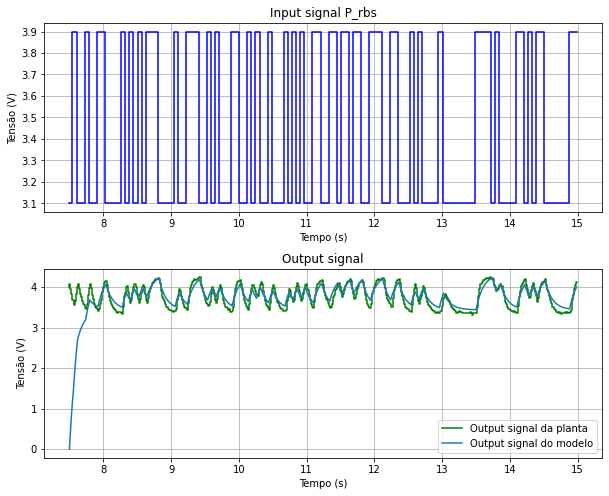

In [ ]:
plt.figure(figsize=(10, 8))                     # Amplia a Figura
plt.subplot(211)
plt.plot(t_val, x_val, 'b',drawstyle='steps')
plt.title('Input signal P_rbs')
plt.xlabel('Tempo (s)')
plt.ylabel('Tensão (V)')
plt.grid(True)

plt.subplot(212)
plt.plot(t_val, y_val, 'g', drawstyle='steps')
plt.plot(t_val, y_pred1)
plt.title('Output signal')
plt.xlabel('Tempo (s)')
plt.ylabel('Tensão (V)')
plt.legend(loc = 'lower right', labels = ('Output signal da planta', 'Output signal do modelo'))
plt.subplots_adjust(hspace=0.3)
plt.grid(True)


<p align = "justify" >
<fon size="4" face="Times New Romaw, Times, serif">
Tomando para calcular a função de transferência, determina-se as condições iniciais nula, o que pode ser avaliado na figura, o modelo inicia em zero e depois o sistema apresenta um transitório e a partir de um determinado tempo, o sistema converge para o sinal de saída da planta.

## <center> **3.2 Estimação do MQ para o sistema de segunda ordem**

$$H(z2) = \frac{b_1 z^{-1} + b_0 z^{-2}}{1 + a_1 z^{-1} + a_2 z^{-2}}$$

In [ ]:
# Segunda ordem
n2 = np.arange(2, len(t_iden))

In [ ]:
M2 = np.array([-y_iden[n2-1], -y_iden[n2-2], x_iden[n2-1], x_iden[n2-2]]).T  # Matriz de Regressão
x2 = np.linalg.inv(M2.T@M2)@M2.T@y_iden[n2]                                  # Coeficientes

In [ ]:
a1, a2, b1, b2 = x2
B = [b1, b2]
A = [1, a1, a2]
Ts = np.mean(np.diff(t_iden)) # Usando uma faixa de tempo
Hz2 = ct.tf(B, A, Ts)
print(Hz2)


 0.004402 z + 0.1573
----------------------
z^2 - 1.192 z + 0.3383

dt = 0.014999999999999873



## <center> **3.2.1 Métrica MSE**
<p align = "justify" >
<fon size="4" face="Times New Romaw, Times, serif">
$$MSE = \frac{1}{n} \sum_{i=1}^{n}(y_i - \hat{y}_i)^2$$

In [ ]:
_,y_pred2 = ct.forced_response(Hz2, U=x_val)
MSE2= 0
cont=np.arange(100,len(y_pred2))                           
for i in cont:
  MSE2=MSE2+(y_val[i]-y_pred2[i])**2
MSE2=MSE2/len(cont)
print('Erro médio quadrático: %.8f' % MSE2) # 8 casas decimais 

Erro médio quadrático: 0.00371598


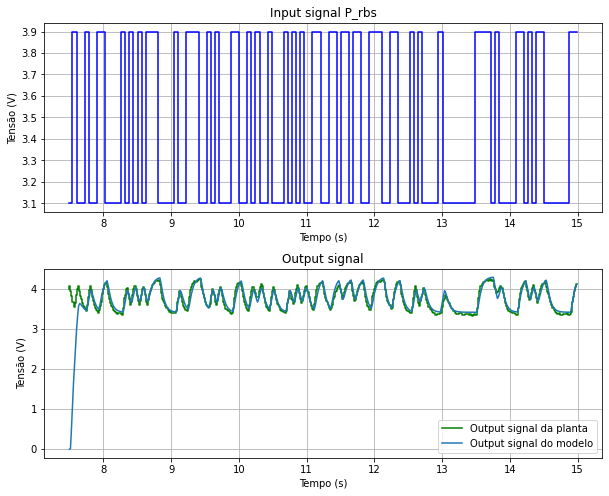

In [ ]:
plt.figure(figsize=(10, 8))                             # Amplia a Figura
plt.subplot(211)
plt.plot(t_val, x_val, 'b', drawstyle='steps')
plt.title('Input signal P_rbs')
plt.xlabel('Tempo (s)')
plt.ylabel('Tensão (V)')
plt.grid(True)

plt.subplot(212)
plt.plot(t_val, y_val, 'g', drawstyle='steps')
plt.plot(t_val, y_pred2)
plt.title('Output signal')
plt.xlabel('Tempo (s)')
plt.ylabel('Tensão (V)')
plt.legend(loc = 'lower right', labels = ('Output signal da planta', 'Output signal do modelo'))
plt.subplots_adjust(hspace=0.3)
plt.grid(True)

<p align = "justify" >
<fon size="4" face="Times New Romaw, Times, serif">
Tomando para calcular a função de transferência, determina-se as condições iniciais nula, o que pode ser avaliado na figura, o modelo inicia em zero e depois o sistema apresenta um transitório e a partir de um determinado tempo, o sistema converge para o sinal de saída da planta. A diferença deste modelo para o comentado na seção anterior, é que o modelo do sistema de segunda ordem apresenta um comportamento um pouco próximo ao da planta na realidade.

## <center> **3.3 Estimação do MQ para o sistema de terceira ordem**

$$H(z2) = \frac{b_1 z^{-1} + b_0 z^{-2} + b_3 z^{-3}}{1 + a_1 z^{-1} + a_2 z^{-2} + a_3 z^{-3}}$$

In [ ]:
# Terceira ordem
n3 = np.arange(3, len(t_iden))
M3 = np.array([-y_iden[n3-1], -y_iden[n3-2],-y_iden[n3-3], x_iden[n3-1], x_iden[n3-2],x_iden[n3-3]]).T   # Matriz de Regressão
x3 = np.linalg.inv(M3.T@M3)@M3.T@y_iden[n3]                                                              # Coeficientes

In [ ]:
a1, a2,a3, b1, b2, b3 = x3
B = [b1, b2, b3]
A = [1, a1, a2, a3]
Ts = np.mean(np.diff(t_iden))                                                                             # Usando uma faixa de tempo
Hz3 = ct.tf(B, A, Ts)
print(Hz3)


  0.01044 z^2 + 0.1297 z + 0.06866
-------------------------------------
z^3 - 0.8937 z^2 - 0.08021 z + 0.1632

dt = 0.014999999999999873



## <center> **3.3.1 Métrica MSE**

<p align = "justify" >
<fon size="4" face="Times New Romaw, Times, serif">

$$MSE = \frac{1}{n} \sum_{i=1}^{n}(y_i - \hat{y}_i)^2$$

In [ ]:
_,y_pred3 = ct.forced_response(Hz3, U=x_val)
MSE3= 0
cont=np.arange(100,len(y_pred3))                           
for i in cont:
  MSE3=MSE3+(y_val[i]-y_pred3[i])**2
MSE3=MSE3/len(cont)
print('Erro médio quadrático: %.8f' % MSE3)

Erro médio quadrático: 0.00389108


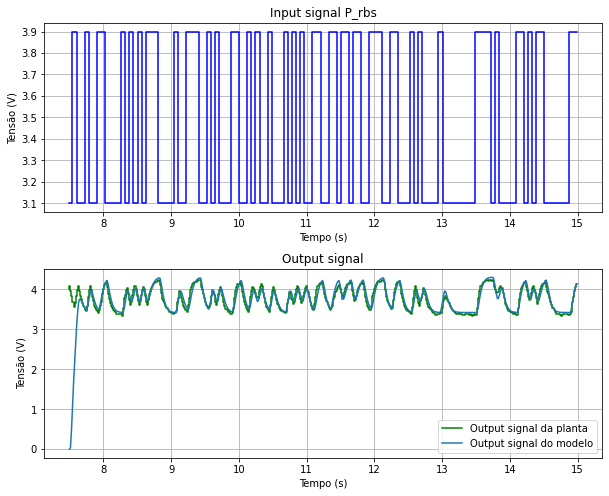

In [ ]:
plt.figure(figsize=(10, 8))
plt.subplot(211)                                            # Amplia a Figura
plt.plot(t_val, x_val, 'b', drawstyle='steps')
plt.title('Input signal P_rbs')
plt.xlabel('Tempo (s)')
plt.ylabel('Tensão (V)')
plt.grid(True)

plt.subplot(212)
plt.plot(t_val, y_val, 'g', drawstyle='steps')
plt.plot(t_val, y_pred3)
plt.title('Output signal')
plt.xlabel('Tempo (s)')
plt.ylabel('Tensão (V)')
plt.legend(loc = 'lower right', labels = ('Output signal da planta', 'Output signal do modelo'))
plt.subplots_adjust(hspace=0.3)
plt.grid(True)

<p align = "justify" >
<fon size="4" face="Times New Romaw, Times, serif">
Tomando para calcular a função de transferência, determina-se as condições iniciais nula, o que pode ser avaliado na figura, o modelo inicia em zero e depois o sistema apresenta um transitório e a partir de um determinado tempo, o sistema converge para o sinal de saída da planta. A diferença deste modelo para o de ordens inferiores, é que o de terceira ordem, apresenta um modelo bem próximo ao sistema da planta, nota-se, um comportamento bem próximo ao sistema da realidade.

## <center> **3.4 Resposta a um Sinal Arbitrário**

<p align = "justify" >
<fon size="4" face="Times New Romaw, Times, serif">
Para fins de validação, a função de transferência de terceira ordem, apresentou um melhor comportamento em relação ao sinal de saída da planta. Portanto, esta função de transferência foi submetido a sinais aleatórios, para avaliar a resposta na saída a sinais de senóide, dente de serra e degrau.

In [ ]:
from scipy.signal import square,sawtooth

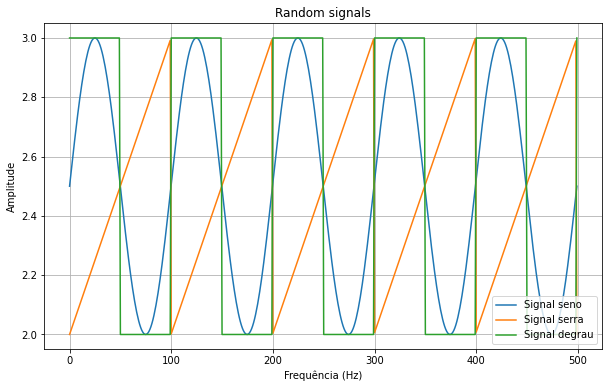

In [ ]:
A=0.5                                                                            # Amplitude Seno
f=0.5                                                                            # Frequência
s=2.5                                                                            # Setpoint
sen=np.zeros(len(y_val))
degrau=np.zeros(len(y_val))
serra=np.zeros(len(y_val))
t=np.linspace(0,10,len(y_val))

for i in np.arange(len(y_val)):
  sen[i] = A*np.sin(2*np.pi*f*t[i]) + s
  degrau[i] = A*square(2*np.pi*f*t[i]) + s
  serra[i] = A*sawtooth(2*np.pi*f*t[i]) + s

plt.figure(figsize=(10,6))
plt.plot(sen)
plt.plot(serra)
plt.plot(degrau)
plt.title('Random signals')
plt.ylabel('Amplitude')
plt.xlabel('Frequência (Hz)')
plt.legend(loc = 'lower right', labels = ('Signal seno','Signal serra','Signal degrau'))
plt.subplots_adjust(hspace=0.3)
plt.grid(True)

<p align = "justify" >
<fon size="4" face="Times New Romaw, Times, serif">
A figura apresenta a geração dos três sinais aleatórios para a etapa de validação, os quais são: seno, dente de serra e degrau.

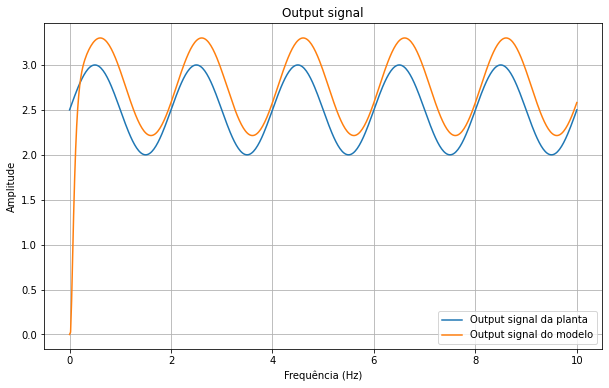

In [ ]:
# Aplicando o sinal seno no modelo identificado Hz3
_,saidasen= ct.forced_response(Hz3, U=sen)    
plt.figure(figsize=(10,6))
plt.plot(t,sen)
plt.plot(t,saidasen)
plt.title('Output signal')
plt.ylabel('Amplitude')
plt.xlabel('Frequência (Hz)')
plt.legend(loc = 'lower right', labels = ('Output signal da planta', 'Output signal do modelo'))
plt.grid(True)

<p align = "justify" >
<fon size="4" face="Times New Romaw, Times, serif">
Observa-se que o modelo $H(z3)$, com condições iniciais nula, apresenta um rápido transitório e praticamente a mesma fase em relação ao da senóide da planta. Isso se dá as não-linearidades do sistema em estudo. Como o sinal aplicado na entrada não mudou na saída, isso permite afirmar que o sistema é linear. Entretanto, o processo das não-linearidades merece ser abordado com a utilização de estratégias de controle, para analisar o comportamento, porém esta etapa será investigado em trabalhos futuras.

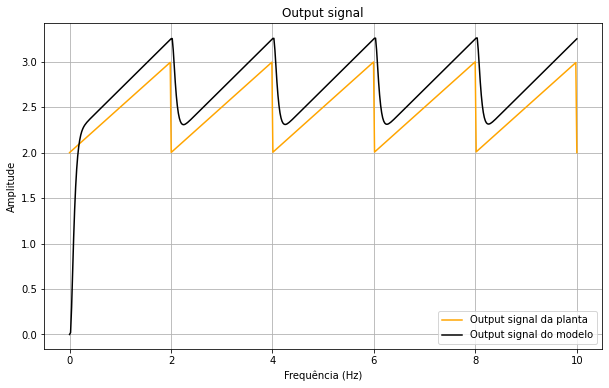

In [ ]:
# Aplicando o sinal dente de serra no modelo identificado Hz3
_,saidaserra= ct.forced_response(Hz3, U=serra)    
plt.figure(figsize=(10,6))
plt.plot(t,serra,'orange')
plt.plot(t,saidaserra,'black')
plt.title('Output signal')
plt.ylabel('Amplitude')
plt.xlabel('Frequência (Hz)')
plt.legend(loc = 'lower right', labels = ('Output signal da planta', 'Output signal do modelo'))
plt.grid(True)

<p align = "justify" >
<fon size="4" face="Times New Romaw, Times, serif">
O sinal do modelo comparado ao sinal dente de serra, inicia em zero, devido a condição inicial nula, depois apresenta um transitório, com uma amplitude maior do sinal dente de serra, depois praticamente apresenta a mesma fase do sinal da planta, o que permite dizer que o sistema é linear, pois na saída o sinal não sofreu alteração.

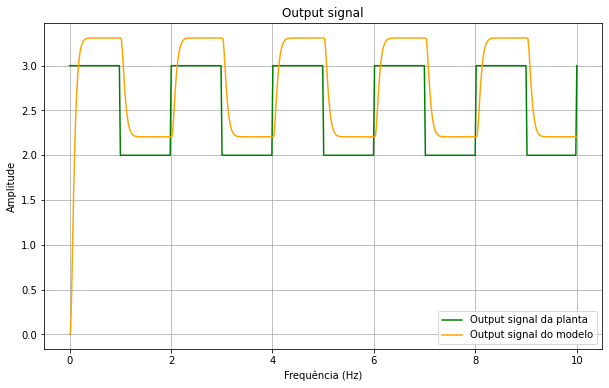

In [ ]:
# Aplicando o sinal degrau no modelo identificado Hz3
_,saidadegrau= ct.forced_response(Hz3, U=degrau)    
plt.figure(figsize=(10,6))
plt.plot(t,degrau,'g')
plt.plot(t,saidadegrau,'orange')
plt.title('Output signal')
plt.ylabel('Amplitude')
plt.xlabel('Frequência (Hz)')
plt.legend(loc = 'lower right', labels = ('Output signal da planta', 'Output signal do modelo'))
plt.grid(True)

<p align = "justify" >
<fon size="4" face="Times New Romaw, Times, serif">
A função de transferência $H(z3)$, a partir de condição inicial nula, apresenta um transitório e depois tenta acompanhar o sinal de saída degrau. No entanto, observa-se um descompasso do modelo ao tentar acompanhar o modelo da planta degrau. De novo, umas das explicações se dá pelas não-linearidades que sofre o sistema.

## <center> **3 Análise da Planta Identificada em Malha Aberta**
Depois da etapa de identificação e validação da função de tranferência, surge a nescessidade de analisar as caracteristicas dessa planta em malha aberta. Trazendo para a discursão pontos importantes como a estabilidade do sistema em malha aberta, a localização dos seus polos e zeros, ...%enrolar um pouco sobre a planta%
Para isso, utilizamos o software MatLab que oferece ferramentas poderosissimas na análise de sistemas. Abaixo é mostrado o código que implementado para declarar a função de transferência identificada no nosso trabalho.

clc, close all, clear


num= [0.01044 0.1297 0.06866]; \\
den= [1 -0.8937 -0.08021 0.1632];

G=tf(num,den,0.1,'Variable','z') %definimos a função de transferência de 3º ordem idêntificada.

rltool(G)

Através da ferramente rltool, é possivel verificar a posição dos zeros e polos no LGR do sistema. Como também a resposta do sistema para uma entrada degrau.

\begin(figure)

## <center> **4 Criar e Análisar a Equação de Diferenças da Planta**

In [ ]:
#Discretizar a entrada u(t)

t=0.1

x_iden=ones(1,15)

## <center> **4 Conclusão**
<p align = "justify" >
<fon size="4" face="Times New Romaw, Times, serif">
Os resultados expostos na seção anterior sugerem que a metodologia proposta é viável para problemas de identificação de sistemas lineares. A principal contribuição do trabalho é a síntese de um procedimento que permite não apenas identificar o comportamento do sistema em termos de suas propriedades invariantes, porém também recuperar um parâmetro com claro significado físico a partir dessas informações em um contexto de modelagem linear.
<p align = "justify" >
<fon size="4" face="Times New Romaw, Times, serif">
A metodologia consiste de identificar uma função de transferência a partir de dados de entrada e de saída para descrever o comportamento do sistema. A proposta foi testada em lingaguem python, com a geração de um sinal pseudo falso, onde o parâmetro de interesse é a função de transferência associado ao sistema que representa a dinâmica motor-gerador.
<p align = "justify" >
<fon size="4" face="Times New Romaw, Times, serif">
Mostrou-se com as comparações que o sistema abordado é de terceira ordem, o que ficou claro nas análises, devido o sistema apresentar um comportamento bem próximo ao da planta, o que era esperado. Foi demonstrado ainda as interferências das não-linearidades no sistema. A conclusão é de que estratégias de controle possam melhorar a resposta do sistema com relação a não-linearidades.
<p align = "justify" >
<fon size="4" face="Times New Romaw, Times, serif">
Comparou-se o sistema de terceira ordem identificado com três sinais aleatórios, o que permite afirmar que ao aplicar um sinal na entrada, a saída não sofre mudança, o que caracteriza considerar que o sistema é linear.
<p align = "justify" >
<fon size="4" face="Times New Romaw, Times, serif">
Este trabalho sugere que a metodologia é viável, porém necessita ser aprofundada. Em especial, é interessante comparar o método com outros métodos na literatura, o que permitiria uma amostra mais profunda desse modelo de identificação.

## <center> **5 Referências Bibliográficas**
<p align = "justify" >
<fon size="4" face="Times New Romaw, Times, serif">
Jing, X. J., Lang, Z. Q. and Billings, S. A. (2008).
Mapping from parametric characteristics to
generalized frequency response functions of
non-linear systems, International Journal of
Control 81(7): 1071{1088.
<p align = "justify" >
<fon size="4" face="Times New Romaw, Times, serif">
POWELL, Harry C. et al. Restructuring an electrical and computer engineering
curriculum: a vertically integrated laboratory/lecture approach. In: Proceedings of
American Society for Engineering Education. p. 12-14. 2015.
